
# Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


In [1]:
#Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from spectral import *
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
data = pd.read_excel(r"C:\Users\htic\Desktop\spectrum_pref_graphs.xlsx")
# data = pd.read_excel(r"C:\Users\htic\Downloads\spectrum.xlsx")
data

,ID,Code,Patho,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16
0,1,2,OSMF,0.191421,0.174875,0.055949,0.000000,0.112394,0.239586,0.306484,0.345753,0.195870,0.167359,0.203625,0.273869,0.318225,0.527925,0.668038,1.0
1,2,2,OSMF,0.123261,0.118690,0.000000,0.019719,0.127201,0.266682,0.331718,0.391610,0.274062,0.260428,0.253298,0.365673,0.382421,0.567064,0.723826,1.0
2,3,2,OSMF,0.300224,0.351791,0.414838,0.507030,0.510306,0.450244,0.455970,0.498334,0.205459,0.083106,0.021932,0.000000,0.093527,0.267567,0.494871,1.0
3,4,2,OSMF,0.007032,0.036216,0.000000,0.003790,0.046489,0.235710,0.338936,0.420374,0.310912,0.288487,0.269548,0.363508,0.325336,0.515001,0.665571,1.0
4,7,2,OSMF,0.558988,0.455298,0.408151,0.235960,0.277474,0.285976,0.232574,0.118370,0.084895,0.002728,0.000000,0.045052,0.123578,0.430776,0.600416,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,237,0,HC,0.402933,0.407196,0.424694,0.441918,0.490910,0.476955,0.404028,0.280489,0.080963,0.000000,0.013815,0.016861,0.074418,0.190684,0.439829,1.0
149,238,0,HC,0.422432,0.412063,0.414179,0.432342,0.465164,0.448680,0.377615,0.266922,0.082164,0.000000,0.016444,0.020638,0.095247,0.177204,0.416705,1.0
150,239,0,HC,0.498230,0.512394,0.526149,0.530809,0.579904,0.559666,0.470445,0.328229,0.095111,0.000000,0.018841,0.011908,0.076573,0.161322,0.408900,1.0
151,242,0,HC,0.388064,0.368870,0.348366,0.348758,0.408950,0.401177,0.337708,0.235195,0.068668,0.000000,0.028398,0.021157,0.099163,0.192523,0.425640,1.0


In [3]:
### To check for Nan ###
nan_check = data.isna()

# To count the number of NaN values in each column, you can use the sum() function:
nan_counts = nan_check.sum()

# To count the total number of NaN values in the entire DataFrame, you can use the sum() function twice:
total_nan_count = nan_check.sum().sum()

# Print the results
print("NaN counts in each column:")
print(nan_counts)

print(f"Total NaN count in the DataFrame: {total_nan_count}")

NaN counts in each column:
ID         0
Code       0
Patho      0
Band 1     0
Band 2     0
Band 3     0
Band 4     0
Band 5     0
Band 6     0
Band 7     0
Band 8     0
Band 9     0
Band 10    0
Band 11    0
Band 12    0
Band 13    0
Band 14    0
Band 15    0
Band 16    0
dtype: int64
Total NaN count in the DataFrame: 0


In [4]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    MLPClassifier(alpha=1, max_iter=10000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


X = data.iloc[: , -16:]
y = data.Code

# Extract the ID column
ids = data['ID']

class_names = data["Patho"].unique()
print(class_names)

['OSMF' 'OSCC' 'Leukoplakia' 'HS' 'HC']


In [5]:
def mlp_result(disease1, disease2):
    def calculate_metrics(y_test, y_pred, labels):
        cm = confusion_matrix(y_test, y_pred)

        for i, label in enumerate(labels):
            tn = cm[i, i]
            fp = np.sum(cm[:, i]) - tn
            fn = np.sum(cm[i, :]) - tn
            tp = np.sum(cm) - (tn + fp + fn)

            sensitivity = tp / (tp + fn)
            specificity = tn / (tn + fp)
            ppv = tp / (tp + fp)
            npv = tn / (tn + fn)

            print(f"Class: {label}")
            print(f"TN: {tn}")
            print(f"FP: {fp}")
            print(f"FN: {fn}")
            print(f"TP: {tp}")
            print(f"Sensitivity: {sensitivity:.2f}")
            print(f"Specificity: {specificity:.2f}")
            print(f"PPV: {ppv:.2f}")
            print(f"NPV: {npv:.2f}")
            print()

    # Filter the data to include only the rows with "OSCC" and "HC" classes
    filtered_data = data[data['Patho'].isin([f'{disease1}', f'{disease2}'])]

    # Copy the last 16 bands as features (X) and the labels (y)
    X = filtered_data.iloc[:, -16:].copy()
    y = filtered_data['Code']

    # Preprocess dataset, split into training and test parts
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    mlp = make_pipeline(StandardScaler(), MLPClassifier(
        hidden_layer_sizes=(16,),
        max_iter=10000,
        alpha=1e-5,
        solver="adam",
        verbose=10,
        random_state=1,
        learning_rate_init=0.0001,))

    mlp.fit(X_train, y_train)

    print("Training set score: %f" % mlp.score(X_train, y_train))
    print("Test set score: %f" % mlp.score(X_test, y_test))

    # Define the two class labels you are using
    class_names = [f"{disease1}", f"{disease2}"]

    titles_options = [
        ("Confusion matrix", None),
    ]

    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            mlp,
            X_test,
            y_test,
            display_labels=class_names,  # Update the display_labels with the two class labels
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

    y_pred = mlp.predict(X_test)

    # Calculate and print the F1 score, precision, and recall
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 score
    # Print the classification report
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1}")

    labels = [f'{disease1}', f'{disease2}']
    cm = confusion_matrix(y_test, y_pred)
    calculate_metrics(y_test, y_pred, labels)


Iteration 1, loss = 0.69323360


Iteration 2, loss = 0.69258512
Iteration 3, loss = 0.69193758
Iteration 4, loss = 0.69129100
Iteration 5, loss = 0.69064490
Iteration 6, loss = 0.68999978
Iteration 7, loss = 0.68935566
Iteration 8, loss = 0.68871256
Iteration 9, loss = 0.68807050
Iteration 10, loss = 0.68742949
Iteration 11, loss = 0.68678955
Iteration 12, loss = 0.68615070
Iteration 13, loss = 0.68551295
Iteration 14, loss = 0.68487631
Iteration 15, loss = 0.68424080
Iteration 16, loss = 0.68360643
Iteration 17, loss = 0.68297322
Iteration 18, loss = 0.68234277
Iteration 19, loss = 0.68171441
Iteration 20, loss = 0.68109356
Iteration 21, loss = 0.68047423
Iteration 22, loss = 0.67985640
Iteration 23, loss = 0.67924002
Iteration 24, loss = 0.67862508
Iteration 25, loss = 0.67801153
Iteration 26, loss = 0.67739937
Iteration 27, loss = 0.67678774
Iteration 28, loss = 0.67617734
Iteration 29, loss = 0.67557062
Iteration 30, loss = 0.67496595
Iteration 31, loss = 0.67436265
Iteration 32, loss = 0.67376072
Iteration 33, lo

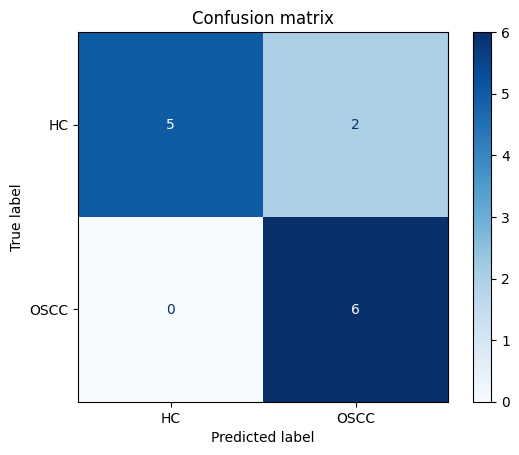

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           4       0.75      1.00      0.86         6

    accuracy                           0.85        13
   macro avg       0.88      0.86      0.85        13
weighted avg       0.88      0.85      0.84        13

F1 Score: 0.8443223443223442
Class: HC
TN: 5
FP: 0
FN: 2
TP: 6
Sensitivity: 0.75
Specificity: 1.00
PPV: 1.00
NPV: 0.71

Class: OSCC
TN: 6
FP: 2
FN: 0
TP: 5
Sensitivity: 1.00
Specificity: 0.75
PPV: 0.71
NPV: 1.00



In [6]:
### HC vs OSCC
mlp_result(disease1= 'HC', disease2= "OSCC" )

Iteration 1, loss = 0.83874814
Iteration 2, loss = 0.83793520
Iteration 3, loss = 0.83712302
Iteration 4, loss = 0.83631416
Iteration 5, loss = 0.83550753
Iteration 6, loss = 0.83470181
Iteration 7, loss = 0.83389695
Iteration 8, loss = 0.83309294
Iteration 9, loss = 0.83228978
Iteration 10, loss = 0.83148748
Iteration 11, loss = 0.83068603
Iteration 12, loss = 0.82988936
Iteration 13, loss = 0.82909584
Iteration 14, loss = 0.82830325
Iteration 15, loss = 0.82751160
Iteration 16, loss = 0.82672088
Iteration 17, loss = 0.82593109
Iteration 18, loss = 0.82514222
Iteration 19, loss = 0.82435428
Iteration 20, loss = 0.82356727
Iteration 21, loss = 0.82278119
Iteration 22, loss = 0.82200071
Iteration 23, loss = 0.82122431
Iteration 24, loss = 0.82044922
Iteration 25, loss = 0.81967676
Iteration 26, loss = 0.81890860
Iteration 27, loss = 0.81814433
Iteration 28, loss = 0.81738203
Iteration 29, loss = 0.81662059
Iteration 30, loss = 0.81585960
Iteration 31, loss = 0.81509971
Iteration 32, los

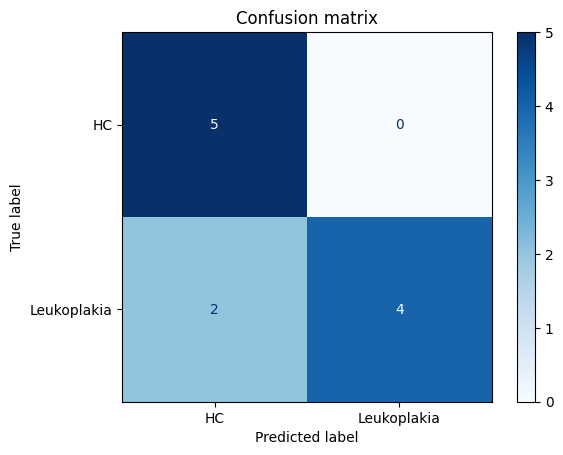

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           3       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11

F1 Score: 0.8151515151515152
Class: HC
TN: 5
FP: 2
FN: 0
TP: 4
Sensitivity: 1.00
Specificity: 0.71
PPV: 0.67
NPV: 1.00

Class: Leukoplakia
TN: 4
FP: 0
FN: 2
TP: 5
Sensitivity: 0.71
Specificity: 1.00
PPV: 1.00
NPV: 0.67



In [7]:
### HC vs Leuko
mlp_result(disease1= 'HC', disease2= "Leukoplakia" )

Iteration 1, loss = 0.69435539
Iteration 2, loss = 0.69393778
Iteration 3, loss = 0.69352072
Iteration 4, loss = 0.69310425
Iteration 5, loss = 0.69268835
Iteration 6, loss = 0.69227305
Iteration 7, loss = 0.69185836
Iteration 8, loss = 0.69144427
Iteration 9, loss = 0.69103110
Iteration 10, loss = 0.69062152
Iteration 11, loss = 0.69021269
Iteration 12, loss = 0.68980455
Iteration 13, loss = 0.68939712
Iteration 14, loss = 0.68899040
Iteration 15, loss = 0.68858172
Iteration 16, loss = 0.68817305
Iteration 17, loss = 0.68776500
Iteration 18, loss = 0.68735787
Iteration 19, loss = 0.68695152
Iteration 20, loss = 0.68654615
Iteration 21, loss = 0.68614196
Iteration 22, loss = 0.68573846
Iteration 23, loss = 0.68533566
Iteration 24, loss = 0.68493357
Iteration 25, loss = 0.68453218
Iteration 26, loss = 0.68413152
Iteration 27, loss = 0.68373158
Iteration 28, loss = 0.68333237
Iteration 29, loss = 0.68293389
Iteration 30, loss = 0.68253615
Iteration 31, loss = 0.68214304
Iteration 32, los

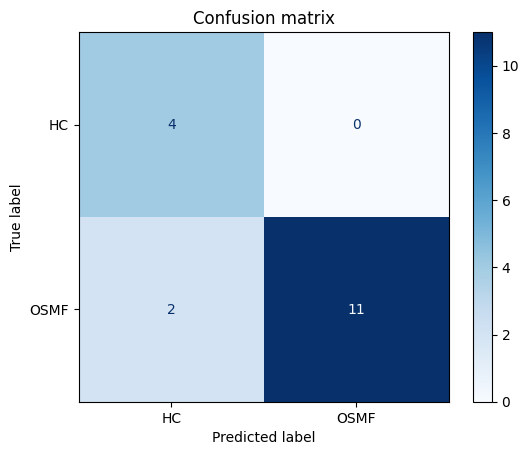

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           2       1.00      0.85      0.92        13

    accuracy                           0.88        17
   macro avg       0.83      0.92      0.86        17
weighted avg       0.92      0.88      0.89        17

F1 Score: 0.8892156862745099
Class: HC
TN: 4
FP: 2
FN: 0
TP: 11
Sensitivity: 1.00
Specificity: 0.67
PPV: 0.85
NPV: 1.00

Class: OSMF
TN: 11
FP: 0
FN: 2
TP: 4
Sensitivity: 0.67
Specificity: 1.00
PPV: 1.00
NPV: 0.85



In [8]:
### HC vs OSMF
mlp_result(disease1= 'HC', disease2= "OSMF" )

Iteration 1, loss = 0.69256970
Iteration 2, loss = 0.69190915
Iteration 3, loss = 0.69125134
Iteration 4, loss = 0.69059466
Iteration 5, loss = 0.68993907
Iteration 6, loss = 0.68928450
Iteration 7, loss = 0.68863445
Iteration 8, loss = 0.68798659
Iteration 9, loss = 0.68733993
Iteration 10, loss = 0.68669446
Iteration 11, loss = 0.68605014
Iteration 12, loss = 0.68540697
Iteration 13, loss = 0.68476495
Iteration 14, loss = 0.68412406
Iteration 15, loss = 0.68348432
Iteration 16, loss = 0.68284573
Iteration 17, loss = 0.68220862
Iteration 18, loss = 0.68157273
Iteration 19, loss = 0.68093802
Iteration 20, loss = 0.68030449
Iteration 21, loss = 0.67967213
Iteration 22, loss = 0.67904096
Iteration 23, loss = 0.67841135
Iteration 24, loss = 0.67778321
Iteration 25, loss = 0.67715558
Iteration 26, loss = 0.67652864
Iteration 27, loss = 0.67590209
Iteration 28, loss = 0.67527431
Iteration 29, loss = 0.67464749
Iteration 30, loss = 0.67402167
Iteration 31, loss = 0.67339688
Iteration 32, los

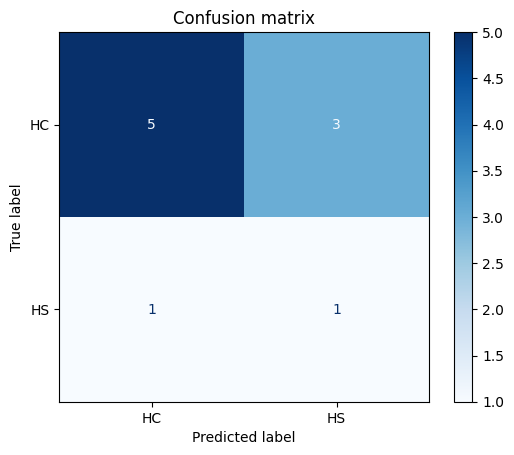

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.25      0.50      0.33         2

    accuracy                           0.60        10
   macro avg       0.54      0.56      0.52        10
weighted avg       0.72      0.60      0.64        10

F1 Score: 0.6380952380952382
Class: HC
TN: 5
FP: 1
FN: 3
TP: 1
Sensitivity: 0.25
Specificity: 0.83
PPV: 0.50
NPV: 0.62

Class: HS
TN: 1
FP: 3
FN: 1
TP: 5
Sensitivity: 0.83
Specificity: 0.25
PPV: 0.62
NPV: 0.50



In [9]:
### HC vs HS
mlp_result(disease1= 'HC', disease2= "HS" )

Iteration 1, loss = 0.74463366
Iteration 2, loss = 0.74418763
Iteration 3, loss = 0.74374208
Iteration 4, loss = 0.74329703
Iteration 5, loss = 0.74285249
Iteration 6, loss = 0.74240846
Iteration 7, loss = 0.74196497
Iteration 8, loss = 0.74152201
Iteration 9, loss = 0.74107960
Iteration 10, loss = 0.74063780
Iteration 11, loss = 0.74019872
Iteration 12, loss = 0.73976019
Iteration 13, loss = 0.73932221
Iteration 14, loss = 0.73888481
Iteration 15, loss = 0.73844800
Iteration 16, loss = 0.73801176
Iteration 17, loss = 0.73757600
Iteration 18, loss = 0.73714084
Iteration 19, loss = 0.73670617
Iteration 20, loss = 0.73627162
Iteration 21, loss = 0.73583614
Iteration 22, loss = 0.73541244
Iteration 23, loss = 0.73499010
Iteration 24, loss = 0.73456585
Iteration 25, loss = 0.73414039
Iteration 26, loss = 0.73371415
Iteration 27, loss = 0.73328744
Iteration 28, loss = 0.73286049
Iteration 29, loss = 0.73243347
Iteration 30, loss = 0.73200651
Iteration 31, loss = 0.73157973
Iteration 32, los

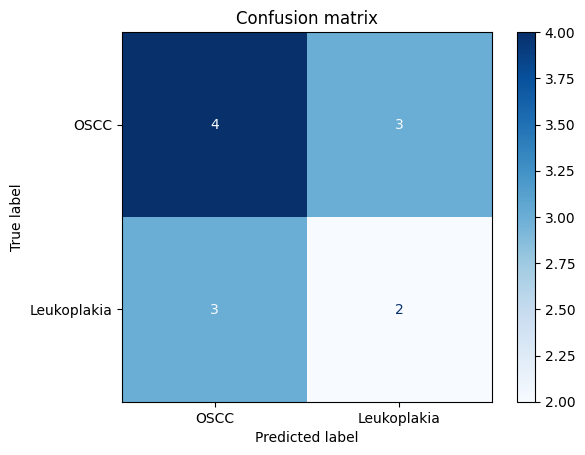

              precision    recall  f1-score   support

           3       0.57      0.57      0.57         7
           4       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12

F1 Score: 0.5
Class: OSCC
TN: 4
FP: 3
FN: 3
TP: 2
Sensitivity: 0.40
Specificity: 0.57
PPV: 0.40
NPV: 0.57

Class: Leukoplakia
TN: 2
FP: 3
FN: 3
TP: 4
Sensitivity: 0.57
Specificity: 0.40
PPV: 0.57
NPV: 0.40



In [10]:
### HC vs HS
mlp_result(disease1= 'OSCC', disease2= "Leukoplakia" )

In [11]:
data = pd.read_excel(r"C:\Users\htic\Downloads\spectrum_pref_DISH.xlsx")
# data = pd.read_excel(r"C:\Users\htic\Downloads\spectrum.xlsx")
data


,ID,Code,Patho,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16
0,1,1,D,0.191421,0.174875,0.055949,0.000000,0.112394,0.239586,0.306484,0.345753,0.195870,0.167359,0.203625,0.273869,0.318225,0.527925,0.668038,1.0
1,2,1,D,0.123261,0.118690,0.000000,0.019719,0.127201,0.266682,0.331718,0.391610,0.274062,0.260428,0.253298,0.365673,0.382421,0.567064,0.723826,1.0
2,3,1,D,0.300224,0.351791,0.414838,0.507030,0.510306,0.450244,0.455970,0.498334,0.205459,0.083106,0.021932,0.000000,0.093527,0.267567,0.494871,1.0
3,4,1,D,0.007032,0.036216,0.000000,0.003790,0.046489,0.235710,0.338936,0.420374,0.310912,0.288487,0.269548,0.363508,0.325336,0.515001,0.665571,1.0
4,7,1,D,0.558988,0.455298,0.408151,0.235960,0.277474,0.285976,0.232574,0.118370,0.084895,0.002728,0.000000,0.045052,0.123578,0.430776,0.600416,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,237,0,HC,0.402933,0.407196,0.424694,0.441918,0.490910,0.476955,0.404028,0.280489,0.080963,0.000000,0.013815,0.016861,0.074418,0.190684,0.439829,1.0
132,238,0,HC,0.422432,0.412063,0.414179,0.432342,0.465164,0.448680,0.377615,0.266922,0.082164,0.000000,0.016444,0.020638,0.095247,0.177204,0.416705,1.0
133,239,0,HC,0.498230,0.512394,0.526149,0.530809,0.579904,0.559666,0.470445,0.328229,0.095111,0.000000,0.018841,0.011908,0.076573,0.161322,0.408900,1.0
134,242,0,HC,0.388064,0.368870,0.348366,0.348758,0.408950,0.401177,0.337708,0.235195,0.068668,0.000000,0.028398,0.021157,0.099163,0.192523,0.425640,1.0


Iteration 1, loss = 0.60129900
Iteration 2, loss = 0.60078701
Iteration 3, loss = 0.60027540
Iteration 4, loss = 0.59976478
Iteration 5, loss = 0.59925508
Iteration 6, loss = 0.59874569
Iteration 7, loss = 0.59823814
Iteration 8, loss = 0.59773295
Iteration 9, loss = 0.59722885
Iteration 10, loss = 0.59672584
Iteration 11, loss = 0.59622391
Iteration 12, loss = 0.59572073
Iteration 13, loss = 0.59521706
Iteration 14, loss = 0.59471431
Iteration 15, loss = 0.59421253
Iteration 16, loss = 0.59371173
Iteration 17, loss = 0.59321193
Iteration 18, loss = 0.59271291
Iteration 19, loss = 0.59221436
Iteration 20, loss = 0.59171687
Iteration 21, loss = 0.59122047
Iteration 22, loss = 0.59072520
Iteration 23, loss = 0.59023107
Iteration 24, loss = 0.58973834
Iteration 25, loss = 0.58924763
Iteration 26, loss = 0.58875900
Iteration 27, loss = 0.58827201
Iteration 28, loss = 0.58778630
Iteration 29, loss = 0.58730192
Iteration 30, loss = 0.58681912
Iteration 31, loss = 0.58633763
Iteration 32, los

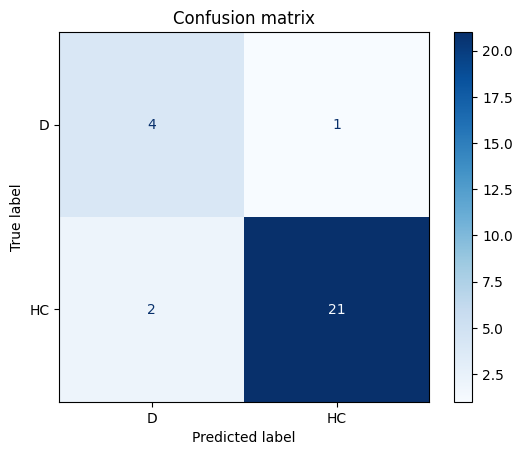

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.95      0.91      0.93        23

    accuracy                           0.89        28
   macro avg       0.81      0.86      0.83        28
weighted avg       0.90      0.89      0.90        28

F1 Score: 0.8965367965367965
Class: D
TN: 4
FP: 2
FN: 1
TP: 21
Sensitivity: 0.95
Specificity: 0.67
PPV: 0.91
NPV: 0.80

Class: HC
TN: 21
FP: 1
FN: 2
TP: 4
Sensitivity: 0.67
Specificity: 0.95
PPV: 0.80
NPV: 0.91



In [12]:
mlp_result(disease1= 'D', disease2= "HC" )
